In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from scipy.stats import norm, skew

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
pd.set_option('max_columns', 100)

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.info() # row1460, col81
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

> We assume that house price is related to OverallQual, YearBuilt, TotalBsmtSF, GrLivArea

# EDA

In [7]:
# check target
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\tingf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

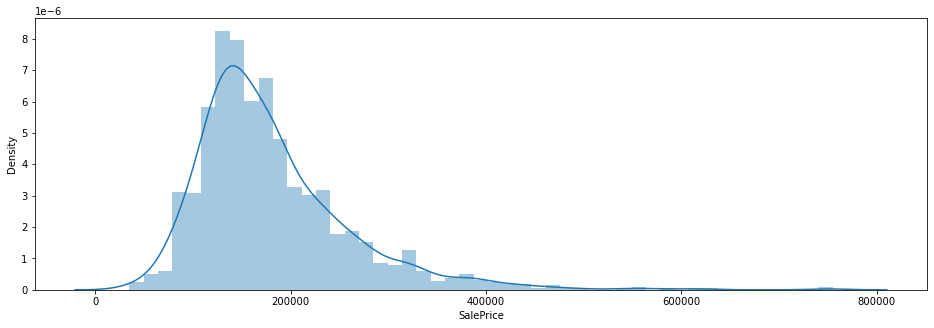

In [8]:
# distplot 
plt.figure(figsize=(16, 5))
sns.distplot(df_train.SalePrice, kde=True)

In [9]:
print("Skewness: %f" % df_train.SalePrice.skew())
print("Kurtosis:%f" % df_train.SalePrice.kurt())

Skewness: 1.882876
Kurtosis:6.536282


Text(0.5, 1.0, 'OverallQual VS SalePrice')

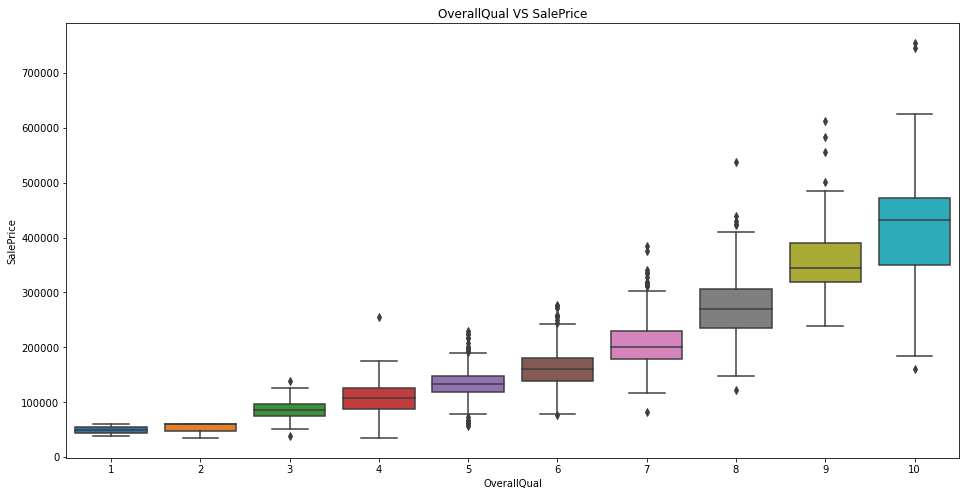

In [10]:
# OverallQual, YearBuilt, TotalBsmtSF, GrLivArea

# OverallQual VS salePrice
df_train.OverallQual.describe()
# df_train.OverallQual.plot.kde() # --> 5-7.5

# plt.scatter(x=df_train.OverallQual, y=df_train.SalePrice)

plt.figure(figsize=(16, 8))
sns.boxplot(x=df_train.OverallQual, y=df_train.SalePrice)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('OverallQual VS SalePrice')

> We can see OverallQual and SalePrice show positive correlation

Text(0.5, 1.0, 'YearBuilt VS SalePrice')

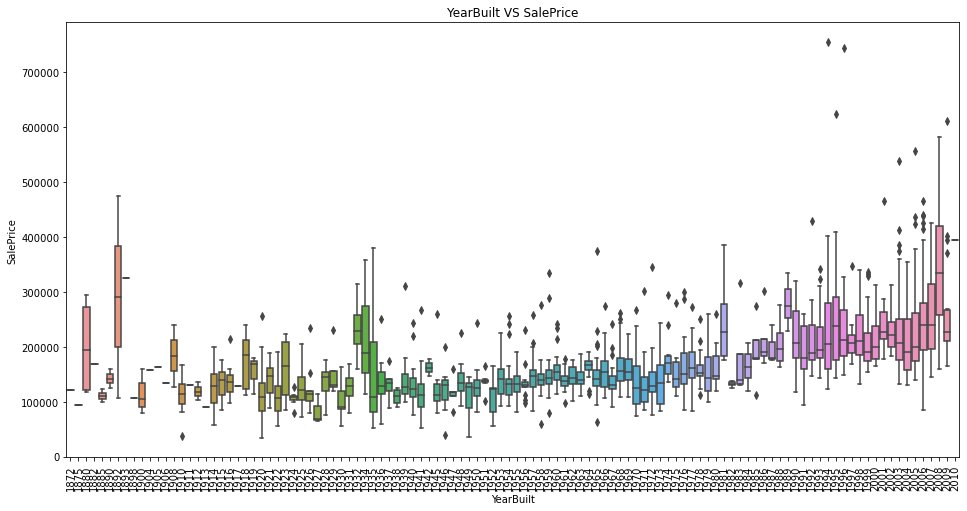

In [11]:
# YearBuilt VS SalePrice
# df_train.YearBuilt.value_counts().sort_values(ascending=False)
plt.figure(figsize=(16, 8))
sns.boxplot(x=df_train.YearBuilt, y=df_train.SalePrice)
plt.xticks(rotation=90)
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title('YearBuilt VS SalePrice')

> We can't see a clear correlation between them, but logically new house is more expensive than the old one.

Text(0.5, 1.0, 'GrLivArea VS SalePrice')

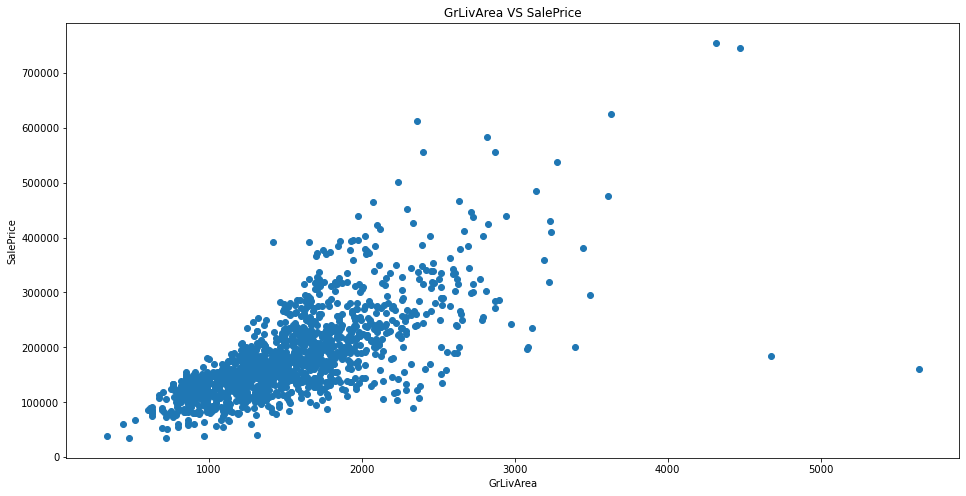

In [12]:
# GrLivArea VS SalePrice
# df_train.GrLivArea.describe()

plt.figure(figsize=(16, 8))
plt.scatter(x=df_train.GrLivArea, y=df_train.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('GrLivArea VS SalePrice')

> It's showing positive correaltion except two outliers, let's treat it later on.

Text(0.5, 1.0, 'TotalBsmtSF VS SalePrice')

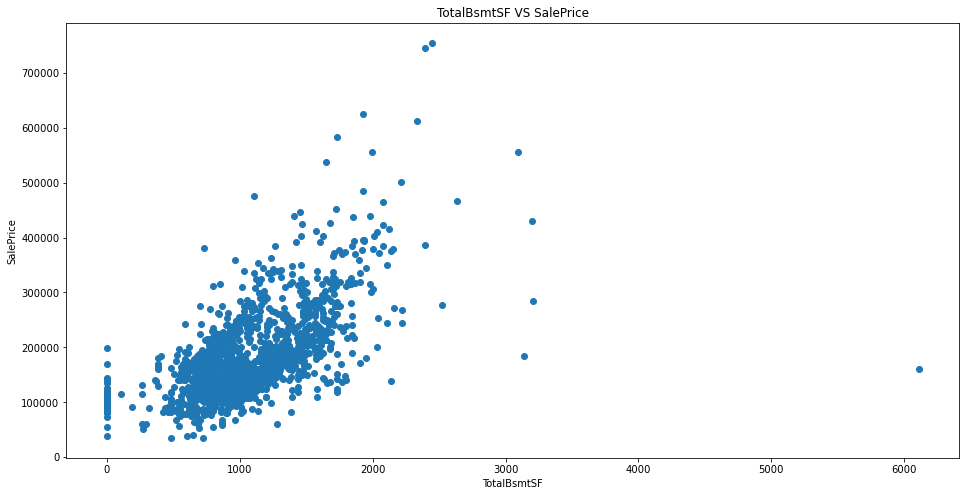

In [13]:
# TotalBsmtSF VS SalePrice

# df_train.TotalBsmtSF.describe()
plt.figure(figsize=(16, 8))
plt.scatter(x=df_train.TotalBsmtSF, y=df_train.SalePrice)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.title('TotalBsmtSF VS SalePrice')

# 'TotalBsmtSF'> 5000

> It's similar to GrLivArea, showing positive correaltion also one obvious outlier.

## Correaltion analysis

Text(0.5, 1.0, 'Correlation matrix')

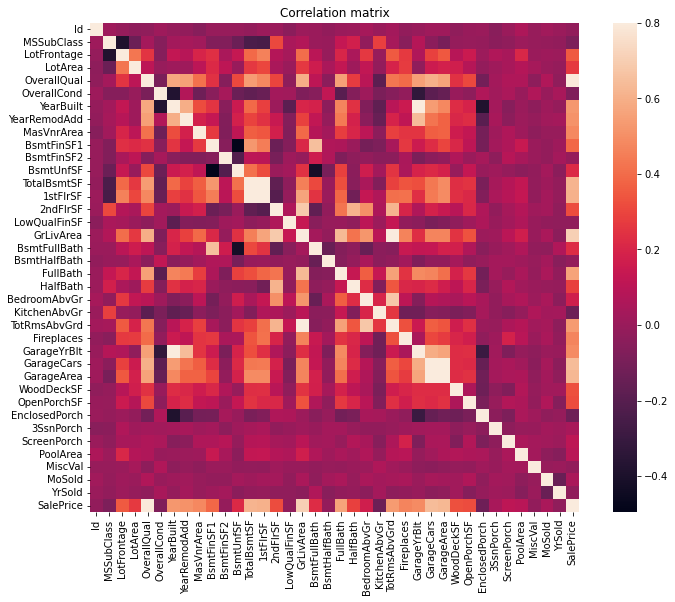

In [14]:
plt.figure(figsize=(12, 9))
corr_matrix = df_train.corr()
sns.heatmap(corr_matrix, vmax=0.8, square=True)
plt.title('Correlation matrix')


> We can notice that there are two white square which are TotaLBsmtSF and 1stFlrSF, GarageArea and GarageCars. That means they have strong correlation. We can consider just keep one.

In [15]:
# Analyze ten variables with the highest correlation to the target SalePrice
k=10
col_10 = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
corr_10 = df_train[col_10].corr()

<AxesSubplot:>

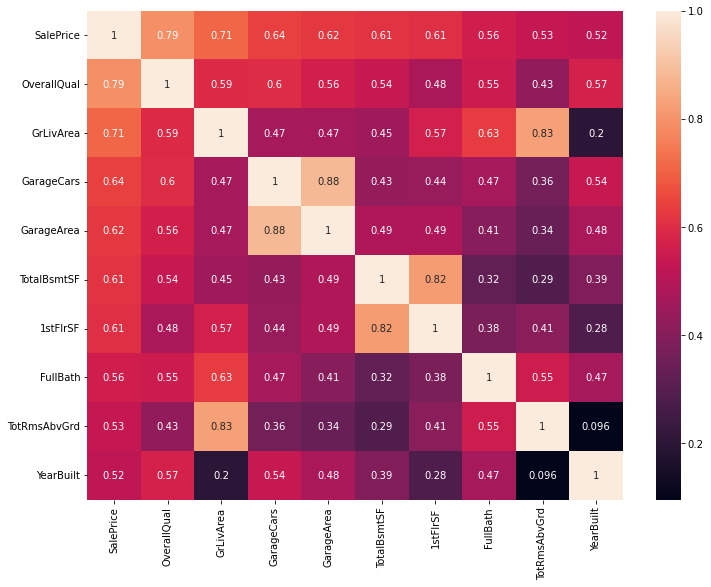

In [16]:
plt.figure(figsize=(12, 9))
# corr_10 = df_train[top11.index.tolist()].corr()
sns.heatmap(corr_10, annot=True)

> Let's keep GarageArea, TotalBsmtSF, GrLivArea --> delete GarageCars, 1stFlrSF,TotRmsAbvGrd

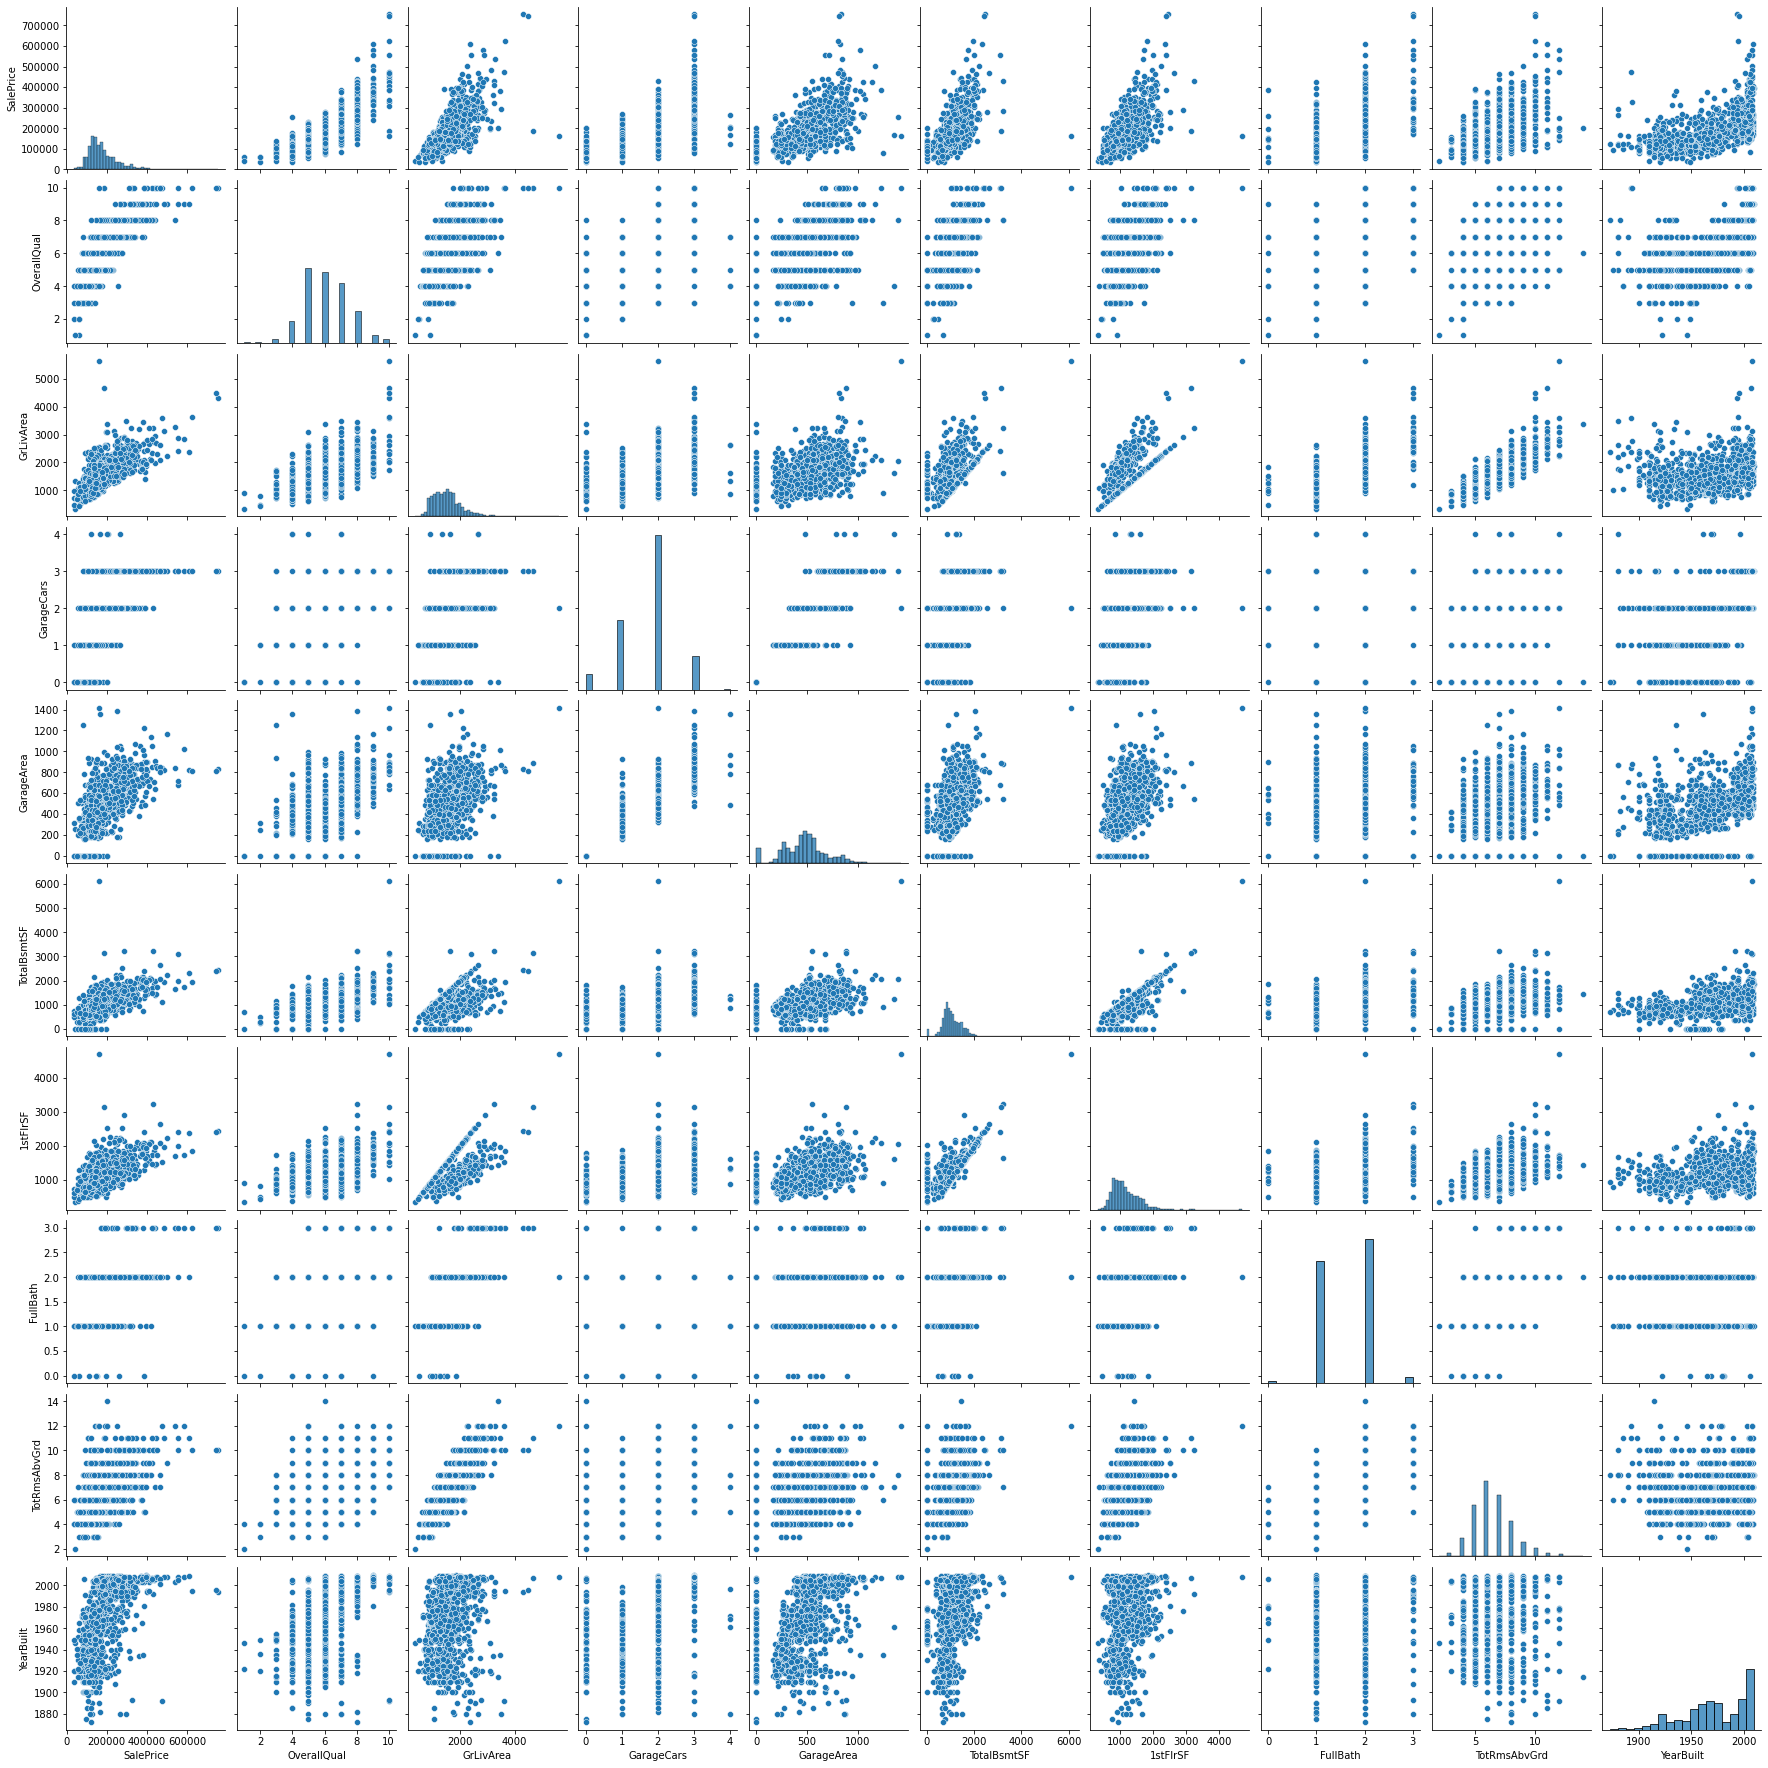

In [17]:
# plot correaltion scatter

# col_10 = col_10.drop(['GarageCars', '1stFlrSF', 'TotRmsAbvGrd'])
col_10
sns.pairplot(df_train[col_10], height=2.5)

# Feature engineering

In [18]:
# deal with useless feature --> ID
train_ID = df_train['Id']
test_ID = df_test['Id']

df_train.drop(['Id'], axis=1, inplace=True)
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

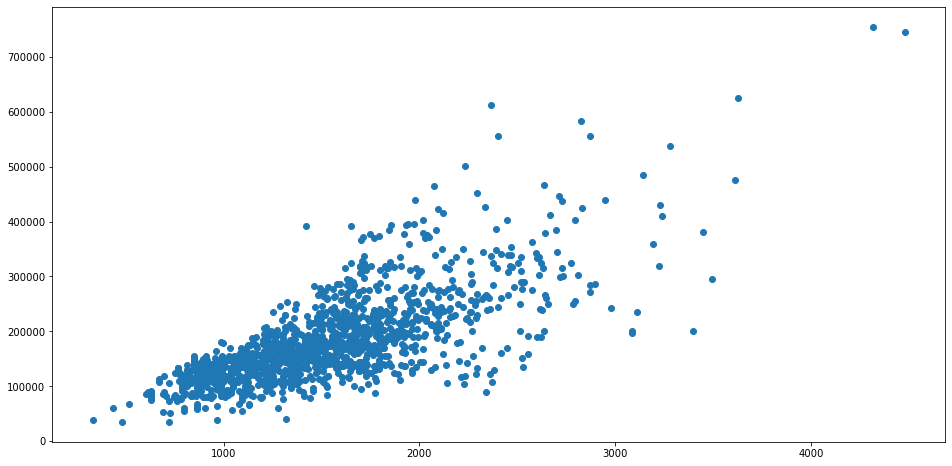

In [19]:
# deal with outliers
df_train = df_train.drop(df_train[
    (df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

# check the result

plt.figure(figsize=(16, 8))
plt.scatter(x=df_train['GrLivArea'], y=df_train['SalePrice'])

In [20]:
# TotalBsmtSF VS SalePrice
# 'TotalBsmtSF'> 5000

df_train = df_train.drop(df_train[df_train['TotalBsmtSF']> 5000].index)

C:\Users\tingf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(180932.91906721535, 79467.78892987774)


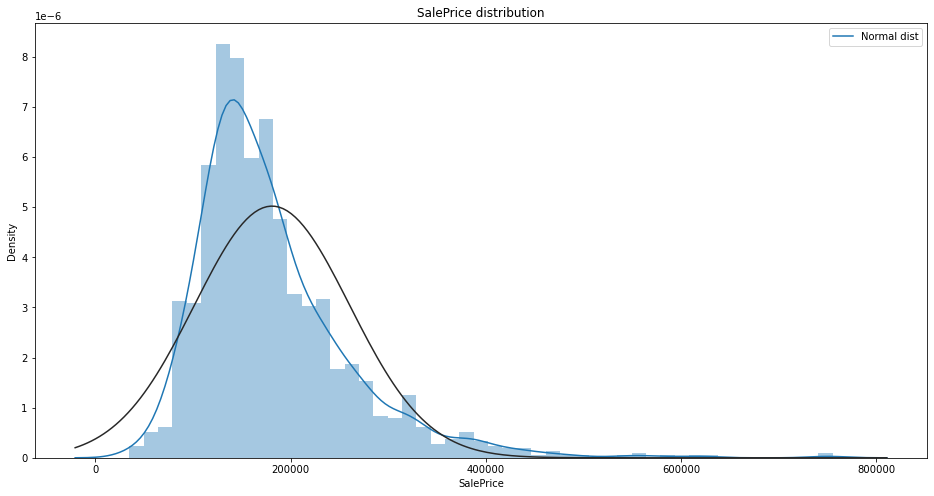

In [21]:
# deal with target 
plt.figure(figsize=(16, 8))
sns.distplot(df_train['SalePrice'], fit=norm)
plt.legend(['Normal dist'], loc='best')
plt.title('SalePrice distribution')

res = norm.fit(df_train['SalePrice'])
print(res)

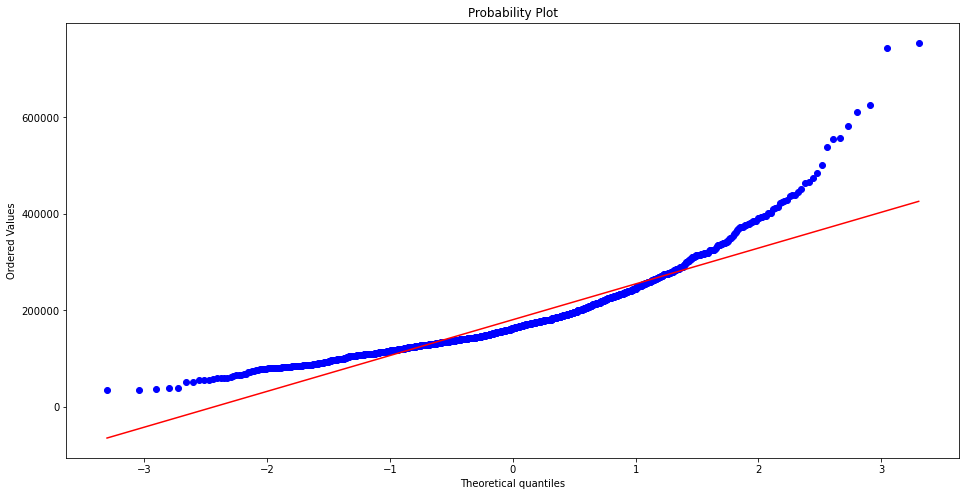

In [22]:
# plot QQ 
plt.figure(figsize=(16, 8))
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [23]:
# use log1p
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

C:\Users\tingf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(12.024015155682552, 0.3995757283645756)


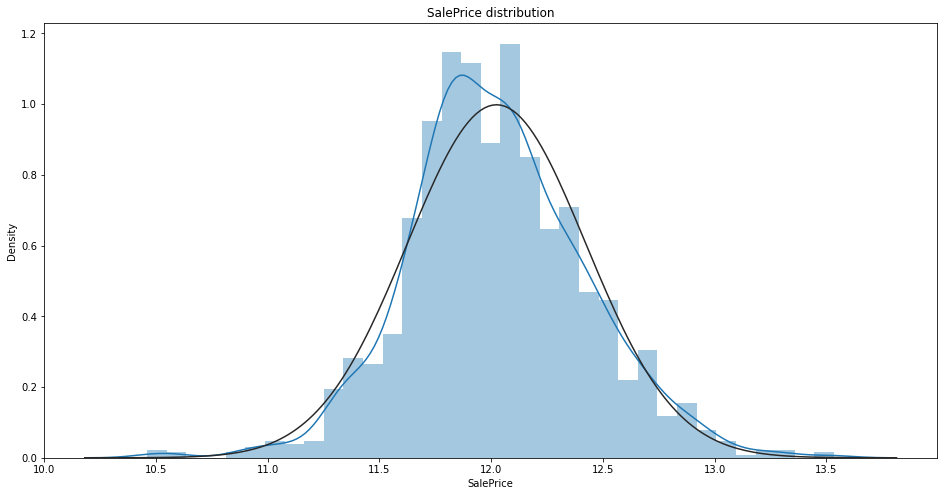

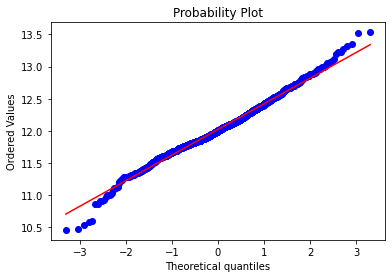

In [24]:
# check the result
plt.figure(figsize=(16, 8))
sns.distplot(df_train.SalePrice, fit=norm);
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

res = norm.fit(df_train['SalePrice'])
print(res)

In [25]:
# deal with missing values
n_train = df_train.shape[0]
n_test = df_test.shape[0]
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.shape

(2917, 80)

In [26]:
all_data.drop('Id', axis=1, inplace=True)

In [27]:
all_data.shape

(2917, 79)

In [28]:
def missing_info(data, num):
    null_data = data.isnull().sum().sort_values()
    pc = data.isnull().sum()/data.isnull().count()
    percentage = pc.apply(lambda x: format(x, '.2%'))
    missing_table = pd.DataFrame({'num': null_data, 'missing percentage':percentage}).sort_values(by='missing percentage', ascending=False)
#   missing_table = pd.DataFrame([null_data,percentage],columns=['num_missing', 'missing percentage'])
    return missing_table.head(num)

missing_data = missing_info(all_data, 50)
missing_data

,num,missing percentage
PoolQC,2908,99.69%
MiscFeature,2812,96.40%
Alley,2719,93.21%
Fence,2346,80.43%
GarageFinish,159,5.45%
GarageQual,159,5.45%
GarageYrBlt,159,5.45%
GarageCond,159,5.45%
GarageType,157,5.38%
FireplaceQu,1420,48.68%


In [29]:
print(all_data.PoolQC.value_counts())
print(all_data.MiscFeature.value_counts())
print(all_data.Alley.value_counts())
print(all_data.Fence.value_counts())

Ex    4
Gd    3
Fa    2
Name: PoolQC, dtype: int64
Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64
Grvl    120
Pave     78
Name: Alley, dtype: int64
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64


In [30]:
# too many missing values, let's make it None

for i in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']:
    all_data[i].fillna('None', inplace=True)
    

In [31]:
all_data[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']].isnull().sum()

PoolQC         0
MiscFeature    0
Alley          0
Fence          0
FireplaceQu    0
dtype: int64

In [32]:
missing_data = missing_info(all_data, 30)
missing_data

,num,missing percentage
GarageCond,159,5.45%
GarageFinish,159,5.45%
GarageQual,159,5.45%
GarageYrBlt,159,5.45%
GarageType,157,5.38%
BsmtExposure,82,2.81%
BsmtCond,82,2.81%
BsmtQual,81,2.78%
BsmtFinType2,80,2.74%
BsmtFinType1,79,2.71%


In [33]:
# The distance between house and the street can be replaced by the similar distance in the same area.
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))


In [34]:
# GarageFinish	159	5.45%
# GarageQual	159	5.45%
# GarageYrBlt	159	5.45%
# GarageCond	159	5.45%
# GarageType	157	5.38%

# deal with categorical variables
for i in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[i] = all_data[i].fillna('None')

# deal with continuous variables

for i in ('GarageYrBlt', 'GarageCars', 'GarageArea'):
    all_data[i] = all_data[i].fillna(0)

In [35]:
all_data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [36]:
all_data[['GarageYrBlt', 'GarageCars', 'GarageArea']].isnull().sum()

GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [37]:
all_data.BsmtFullBath.value_counts()

0.0    1705
1.0    1171
2.0      37
3.0       2
Name: BsmtFullBath, dtype: int64

In [38]:
Bsmt = all_data.columns[all_data.columns.str.contains('Bsmt')]

In [39]:
all_data[Bsmt].dtypes

BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1      float64
BsmtFinType2     object
BsmtFinSF2      float64
BsmtUnfSF       float64
TotalBsmtSF     float64
BsmtFullBath    float64
BsmtHalfBath    float64
dtype: object

In [40]:
all_data[Bsmt].dtypes.index

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath'],
      dtype='object')

In [41]:
for i in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[i] = all_data[i].fillna('None')
    
for i in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath'):
    all_data[i] = all_data[i].fillna(0)

In [42]:
missing_data = missing_info(all_data, 30)
missing_data

,num,missing percentage
MasVnrType,24,0.82%
MasVnrArea,23,0.79%
MSZoning,4,0.14%
Functional,2,0.07%
Utilities,2,0.07%
Exterior1st,1,0.03%
KitchenQual,1,0.03%
Exterior2nd,1,0.03%
Electrical,1,0.03%
SaleType,1,0.03%


In [43]:
# MasVnrType	24	0.82%
# MasVnrArea	23	0.79%

all_data['MasVnrType'].value_counts()
all_data['MasVnrType'].fillna('None', inplace=True)

In [44]:
all_data['MasVnrArea'].value_counts()
all_data['MasVnrArea'].fillna(0, inplace=True)

In [45]:
missing_data = missing_info(all_data, 10)
missing_data

,num,missing percentage
MSZoning,4,0.14%
Functional,2,0.07%
Utilities,2,0.07%
Exterior1st,1,0.03%
KitchenQual,1,0.03%
Exterior2nd,1,0.03%
Electrical,1,0.03%
SaleType,1,0.03%
MiscVal,0,0.00%
MiscFeature,0,0.00%


In [46]:
miss_res = missing_data.index
miss_res

Index(['MSZoning', 'Functional', 'Utilities', 'Exterior1st', 'KitchenQual',
       'Exterior2nd', 'Electrical', 'SaleType', 'MiscVal', 'MiscFeature'],
      dtype='object')

In [47]:
miss_res = all_data.isnull().sum().sort_values(ascending=False).head(8).index
miss_res

Index(['MSZoning', 'Utilities', 'Functional', 'Electrical', 'KitchenQual',
       'Exterior1st', 'Exterior2nd', 'SaleType'],
      dtype='object')

In [48]:
# difference value in train dataset and test dataset, there is no influence for test.
print(df_train.Utilities.unique())
print(df_test.Utilities.unique())
all_data = all_data.drop(['Utilities'], axis=1)

['AllPub' 'NoSeWa']
['AllPub' nan]


In [49]:
# Functional replace by typ which means classic.
all_data['Functional'] = all_data['Functional'].fillna('Type')

In [50]:
missing_data = missing_info(all_data, 10)
missing_data

,num,missing percentage
MSZoning,4,0.14%
Electrical,1,0.03%
KitchenQual,1,0.03%
Exterior1st,1,0.03%
Exterior2nd,1,0.03%
SaleType,1,0.03%
1stFlrSF,0,0.00%
MSSubClass,0,0.00%
MiscFeature,0,0.00%
MasVnrType,0,0.00%


In [51]:
miss_res = missing_data.index
miss_res

Index(['MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd',
       'SaleType', '1stFlrSF', 'MSSubClass', 'MiscFeature', 'MasVnrType'],
      dtype='object')

In [52]:
# There are few missing values in those features, let's treat it with mode.
for i in miss_res:
    all_data[i] = all_data[i].fillna(all_data[i].mode()[0]) 

In [53]:
missing_data = missing_info(all_data, 10)
missing_data

,num,missing percentage
1stFlrSF,0,0.00%
LotFrontage,0,0.00%
MiscFeature,0,0.00%
MasVnrType,0,0.00%
MasVnrArea,0,0.00%
MSZoning,0,0.00%
MSSubClass,0,0.00%
LowQualFinSF,0,0.00%
LotShape,0,0.00%
LotConfig,0,0.00%


In [54]:
# Transformation data
# convert category features 
for i in ('MSSubClass', 'OverallCond', 'YrSold', 'MoSold'):
    all_data[i].astype(str)

In [55]:
# covert ordered features to numeric
import sklearn.preprocessing as sp
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
        'YrSold', 'MoSold')

for c in cols:
    encoder = sp.LabelEncoder()
    all_data[c] = encoder.fit_transform(list(all_data[c].values))

In [56]:
SF = all_data.columns[all_data.columns.str.contains('SF')]
SF

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF'],
      dtype='object')

In [57]:
# arange the features
## create new feature TotalDF

all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2917 non-null   int64  
 1   MSZoning       2917 non-null   object 
 2   LotFrontage    2917 non-null   float64
 3   LotArea        2917 non-null   int64  
 4   Street         2917 non-null   int64  
 5   Alley          2917 non-null   int64  
 6   LotShape       2917 non-null   int64  
 7   LandContour    2917 non-null   object 
 8   LotConfig      2917 non-null   object 
 9   LandSlope      2917 non-null   int64  
 10  Neighborhood   2917 non-null   object 
 11  Condition1     2917 non-null   object 
 12  Condition2     2917 non-null   object 
 13  BldgType       2917 non-null   object 
 14  HouseStyle     2917 non-null   object 
 15  OverallQual    2917 non-null   int64  
 16  OverallCond    2917 non-null   int64  
 17  YearBuilt      2917 non-null   int64  
 18  YearRemo

In [58]:
# delete replicated features
## Garage
#  56  GarageType     2917 non-null   object 
#  57  GarageYrBlt    2917 non-null   float64
#  58  GarageFinish   2917 non-null   int64  
#  59  GarageCars     2917 non-null   float64
#  60  GarageArea     2917 non-null   float64
#  61  GarageQual     2917 non-null   int64  
#  62  GarageCond     2917 non-null   int64

all_data.drop(['GarageCars', 'GarageCond', 'GarageYrBlt'], axis=1, inplace=True)

In [59]:
all_data.columns[all_data.columns.str.contains('Garage')]

Index(['GarageType', 'GarageFinish', 'GarageArea', 'GarageQual'], dtype='object')

In [60]:
all_data.columns[all_data.columns.str.contains('SF')]

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF', 'TotalSF'],
      dtype='object')

In [61]:
all_data.drop(['BsmtUnfSF'], axis=1, inplace=True)

In [62]:
all_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea', 'GarageQual',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch'

In [63]:
# 50  KitchenAbvGr 
# 51  KitchenQual
all_data.drop('KitchenAbvGr', axis=1, inplace=True)

In [64]:
#  54  Fireplaces
#  55  FireplaceQu
all_data.drop('Fireplaces', axis=1, inplace=True)

In [65]:
# MoSold
all_data.drop('MoSold', axis=1, inplace=True)

In [66]:
all_data.shape

(2917, 72)

In [67]:
## deal with skew features 
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skew_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'skew': skew_feats})
skewness.head(10)


,skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


In [68]:
## Since there may be many untreated outliers in the data, we use Box Cox to enhance the stifness of the model to outliers
#--> Box Cox
skewness = skewness[abs(skewness) > 0.75]
import scipy.special as ss

lam = 0.15
for sf in skewness.index:
    all_data[sf] = ss.boxcox1p(all_data[sf], lam)
    

In [69]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,YrSold,SaleType,SaleCondition,TotalSF
0,2.055642,RL,5.831328,19.212182,0.730463,0.730463,1.540963,Lvl,Inside,0.0,CollgCr,Norm,Norm,1Fam,2Story,2.440268,1.820334,14.187527,14.187527,Gable,CompShg,VinylSd,VinylSd,BrkFace,8.059126,1.194318,1.820334,PConc,1.194318,1.820334,1.540963,1.194318,11.170327,2.259674,0.0,11.692623,GasA,0.000000,0.730463,SBrkr,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,1.194318,2.602594,2.259674,1.540963,Attchd,1.194318,10.506271,2.055642,1.194318,0.000000,5.714669,0.000000,0.0,0.0,0.0,1.540963,1.820334,None,0.0,1.194318,WD,Normal,14.976591
1,0.000000,RL,6.221214,19.712205,0.730463,0.730463,1.540963,Lvl,FR2,0.0,Veenker,Feedr,Norm,1Fam,1Story,2.259674,2.440268,14.145138,14.145138,Gable,CompShg,MetalSd,MetalSd,None,0.000000,1.540963,1.820334,CBlock,1.194318,1.820334,0.730463,0.000000,12.062832,2.259674,0.0,12.792276,GasA,0.000000,0.730463,SBrkr,12.792276,0.000000,0.0,12.792276,0.000000,0.730463,1.194318,0.000000,1.540963,1.540963,2.259674,2.259674,2.055642,Attchd,1.194318,10.062098,2.055642,1.194318,9.010206,0.000000,0.000000,0.0,0.0,0.0,1.540963,1.820334,None,0.0,0.730463,WD,Normal,14.923100
2,2.055642,RL,5.914940,20.347241,0.730463,0.730463,0.000000,Lvl,Inside,0.0,CollgCr,Norm,Norm,1Fam,2Story,2.440268,1.820334,14.184404,14.185966,Gable,CompShg,VinylSd,VinylSd,BrkFace,7.646538,1.194318,1.820334,PConc,1.194318,1.820334,1.194318,1.194318,10.200343,2.259674,0.0,11.892039,GasA,0.000000,0.730463,SBrkr,11.892039,11.724598,0.0,13.832085,0.730463,0.000000,1.194318,0.730463,1.540963,1.194318,2.259674,2.259674,2.055642,Attchd,1.194318,10.775536,2.055642,1.194318,0.000000,5.053371,0.000000,0.0,0.0,0.0,1.540963,1.820334,None,0.0,1.194318,WD,Normal,15.149678
3,2.259674,RL,5.684507,19.691553,0.730463,0.730463,0.000000,Lvl,Corner,0.0,Crawfor,Norm,Norm,1Fam,2Story,2.440268,1.820334,14.047529,14.135652,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,1.540963,1.820334,BrkTil,1.820334,0.730463,1.540963,0.000000,8.274266,2.259674,0.0,11.354094,GasA,1.194318,0.730463,SBrkr,12.013683,11.354094,0.0,13.711364,0.730463,0.000000,0.730463,0.000000,1.540963,1.194318,2.440268,2.259674,1.194318,Detchd,1.540963,10.918253,2.055642,1.194318,0.000000,4.745132,8.797736,0.0,0.0,0.0,1.540963,1.820334,None,0.0,0.000000,WD,Abnorml,14.857121
4,2.055642,RL,6.314735,21.325160,0.730463,0.730463,0.000000,Lvl,FR2,0.0,NoRidge,Norm,Norm,1Fam,2Story,2.602594,1.820334,14.182841,14.182841,Gable,CompShg,VinylSd,VinylSd,BrkFace,9.391827,1.194318,1.820334,PConc,1.194318,1.820334,0.000000,1.194318,10.971129,2.259674,0.0,12.510588,GasA,0.000000,0.730463,SBrkr,12.510588,12.271365,0.0,14.480029,0.730463,0.000000,1.194318,0.730463,1.820334,1.194318,2.750250,2.259674,2.055642,Attchd,1.194318,11.627708,2.055642,1.194318,8.013884,6.314735,0.000000,0.0,0.0,0.0,1.540963,1.820334,None,0.0,1.194318,WD,Normal,15.852312


In [70]:
## deal with categorical features by using one-hot
categorical_feats = all_data.dtypes[all_data.dtypes == "object"].index

In [71]:
categorical_data = all_data[categorical_feats]
categorical_data.head()

,MSZoning,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,GarageType,MiscFeature,SaleType,SaleCondition
0,RL,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal
1,RL,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,SBrkr,Attchd,None,WD,Normal
2,RL,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal
3,RL,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,SBrkr,Detchd,None,WD,Abnorml
4,RL,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal


In [72]:
categorical_data.shape

(2917, 20)

In [73]:
all_data.shape

(2917, 72)

In [74]:
all_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageArea', 'GarageQual', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence

In [75]:
# all_data[categorical_feats] = pd.get_dummies(all_data[categorical_feats])
cate_dummies = pd.get_dummies(categorical_data)
# all_data.drop(categorical_feats, axis=1, inplace=True)
all_data = pd.concat([all_data, cate_dummies], axis=1)

In [76]:
all_data.shape

(2917, 233)

In [77]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,...,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.055642,RL,5.831328,19.212182,0.730463,0.730463,1.540963,Lvl,Inside,0.0,CollgCr,Norm,Norm,1Fam,2Story,2.440268,1.820334,14.187527,14.187527,Gable,CompShg,VinylSd,VinylSd,BrkFace,8.059126,1.194318,1.820334,PConc,1.194318,1.820334,1.540963,1.194318,11.170327,2.259674,0.0,11.692623,GasA,0.000000,0.730463,SBrkr,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,1.194318,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0.000000,RL,6.221214,19.712205,0.730463,0.730463,1.540963,Lvl,FR2,0.0,Veenker,Feedr,Norm,1Fam,1Story,2.259674,2.440268,14.145138,14.145138,Gable,CompShg,MetalSd,MetalSd,None,0.000000,1.540963,1.820334,CBlock,1.194318,1.820334,0.730463,0.000000,12.062832,2.259674,0.0,12.792276,GasA,0.000000,0.730463,SBrkr,12.792276,0.000000,0.0,12.792276,0.000000,0.730463,1.194318,0.000000,1.540963,1.540963,...,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2.055642,RL,5.914940,20.347241,0.730463,0.730463,0.000000,Lvl,Inside,0.0,CollgCr,Norm,Norm,1Fam,2Story,2.440268,1.820334,14.184404,14.185966,Gable,CompShg,VinylSd,VinylSd,BrkFace,7.646538,1.194318,1.820334,PConc,1.194318,1.820334,1.194318,1.194318,10.200343,2.259674,0.0,11.892039,GasA,0.000000,0.730463,SBrkr,11.892039,11.724598,0.0,13.832085,0.730463,0.000000,1.194318,0.730463,1.540963,1.194318,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,2.259674,RL,5.684507,19.691553,0.730463,0.730463,0.000000,Lvl,Corner,0.0,Crawfor,Norm,Norm,1Fam,2Story,2.440268,1.820334,14.047529,14.135652,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,1.540963,1.820334,BrkTil,1.820334,0.730463,1.540963,0.000000,8.274266,2.259674,0.0,11.354094,GasA,1.194318,0.730463,SBrkr,12.013683,11.354094,0.0,13.711364,0.730463,0.000000,0.730463,0.000000,1.540963,1.194318,...,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,2.055642,RL,6.314735,21.325160,0.730463,0.730463,0.000000,Lvl,FR2,0.0,NoRidge,Norm,Norm,1Fam,2Story,2.602594,1.820334,14.182841,14.182841,Gable,CompShg,VinylSd,VinylSd,BrkFace,9.391827,1.194318,1.820334,PConc,1.194318,1.820334,0.000000,1.194318,10.971129,2.259674,0.0,12.510588,GasA,0.000000,0.730463,SBrkr,12.510588,12.271365,0.0,14.480029,0.730463,0.000000,1.194318,0.730463,1.820334,1.194318,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [78]:
# all_data.drop([categorical_feats], axis=1, inplace=True)
cf = categorical_feats.tolist()
cf

['MSZoning',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'Electrical',
 'GarageType',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [79]:
all_data.drop(cf, axis=1, inplace=True)

In [80]:
all_data.shape

(2917, 213)

In [81]:
# split train and test
train_data = all_data[:n_train]
test_data = all_data[n_train:]
train_data.shape

(1458, 213)

# Modeling 

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error 


In [83]:
train_y = df_train.SalePrice.values
train_x = train_data

In [84]:
# cross validation
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=7).get_n_splits(train_data.values)
    rmsle = np.sqrt(-cross_val_score(model, train_x, train_y, scoring="neg_mean_squared_error", cv=kf))
    return(rmsle)

In [85]:
# simple model
model = RandomForestRegressor()
rmsle_cv(model)

array([0.13571755, 0.1389667 , 0.14523492, 0.12948241, 0.13949112])

In [86]:
# build first model
import sklearn.metrics as sm
model.fit(train_x, train_y)
pred_test_y = model.predict(test_data)
pred_y= np.expm1(pred_test_y)

In [87]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = pred_y
sub.to_csv('submissionRF.csv', index=False)

In [88]:
# Model Explainability

In [89]:
# Feature engineering

In [90]:
# Hyperparameter optimisation